# Neutrino Parameter Estimation from Oscillation Probability Maps

## Generate random inputs: Maps after Matter Effect

We use a simulator that generates 9 oscillation probability maps:

| Transition ↓ / Source → | $\nu_e$ (source) | $\nu_\mu$ (source) | $\nu_\tau$ (source) |
|--------------------------|------------------|--------------------|---------------------|
| **$\nu_e$ (detected)**  | $P(\nu_e \leftarrow \nu_e)$ | $P(\nu_e \leftarrow \nu_\mu)$ | $P(\nu_e \leftarrow \nu_\tau)$ |
| **$\nu_\mu$ (detected)** | $P(\nu_\mu \leftarrow \nu_e)$ | $P(\nu_\mu \leftarrow \nu_\mu)$ | $P(\nu_\mu \leftarrow \nu_\tau)$ |
| **$\nu_\tau$ (detected)** | $P(\nu_\tau \leftarrow \nu_e)$ | $P(\nu_\tau \leftarrow \nu_\mu)$ | $P(\nu_\tau \leftarrow \nu_\tau)$ |


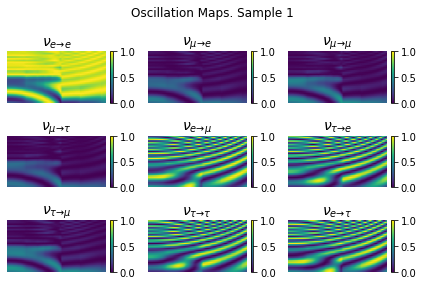

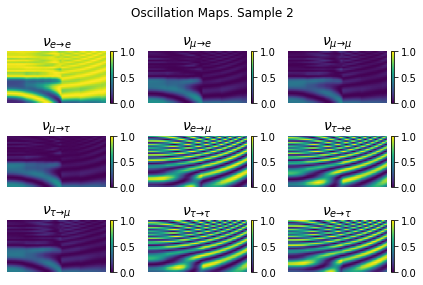

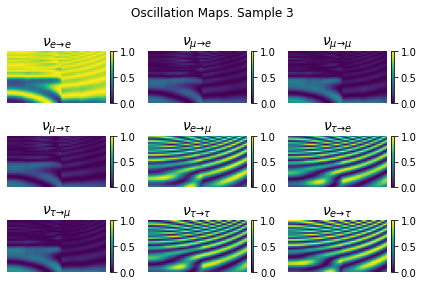

In [1]:
from NuOscParam.utils import *
from NuOscParam.Data.DataRanges import *
from NuOscParam.Data.OscIterableDataset import OscIterableDataset
%matplotlib inline

# Configure generator
generator = iter(OscIterableDataset(ranges=NEUTRINO_RANGES, pred_param="ALL", return_params=True, mode='earth',
                                    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
# Generate three random maps
X_test, Osc_params = [], []
n_samples = 3
for i in range(n_samples):
    xtest, _, osc_pars, _ = next(generator)  # Generate 1 sample
    X_test.append(xtest)
    Osc_params.append(osc_pars)
    # Plot oscillation maps
    input_image = xtest[0, :, :, :].permute(2, 1, 0)
    plot_osc_maps(input_image, title=f"Oscillation Maps. Sample {i+1}")
X_test = torch.cat(X_test, dim=0)

## Point Prediction Demonstration

This is a demonstration where only point predictions are provided (without uncertainty quantification)

In [2]:
from NuOscParam.OscillationEstimator import OscillationEstimator
# Configure predictor
predictor = OscillationEstimator()
# Predict osc. parameters
pred_OscParams = predictor.predict(X_test, denormalize=True)

Processing Time: 39.10105919837952 s1...                                        


In [3]:
import pandas as pd
param_names = [r"$\theta_{12}$", r"$\theta_{23}$", r"$\theta_{13}$", r"$\delta_{CP}$", r"$\Delta m^2_{21}$", r"$\Delta m^2_{31}$"]
for i in range(n_samples):
    print("*" * 80)
    print(f"Results: Sample {i + 1}")
    print("*" * 80)
    df = pd.DataFrame({"Original": Osc_params[i].cpu().numpy().flatten(),
                       "Predicted": pred_OscParams[i, :].flatten()}, index=param_names)
    display(df)

********************************************************************************
Results: Sample 1
********************************************************************************


,Original,Predicted
$\theta_{12}$,31.827747,31.709805
$\theta_{23}$,41.851784,41.749210
$\theta_{13}$,8.337092,8.328096
$\delta_{CP}$,284.614685,285.051758
$\Delta m^2_{21}$,0.000072,0.000071
$\Delta m^2_{31}$,0.002439,0.002441


********************************************************************************
Results: Sample 2
********************************************************************************


,Original,Predicted
$\theta_{12}$,31.672859,31.619057
$\theta_{23}$,46.747688,46.739071
$\theta_{13}$,8.266352,8.259830
$\delta_{CP}$,329.714539,330.527863
$\Delta m^2_{21}$,0.000076,0.000076
$\Delta m^2_{31}$,0.002584,0.002585


********************************************************************************
Results: Sample 3
********************************************************************************


,Original,Predicted
$\theta_{12}$,32.384979,32.378723
$\theta_{23}$,40.754639,40.657665
$\theta_{13}$,8.659875,8.663946
$\delta_{CP}$,161.527969,161.782562
$\Delta m^2_{21}$,0.000069,0.000069
$\Delta m^2_{31}$,0.002554,0.002556


## Uncertainty Quantification Demonstration

This is a demonstration where, in addition to the point predictions, prediction intervals are produced for each prediction

In [4]:
pred_OscParams = predictor.predict(X_test, denormalize=True, uncertainty=True)

Processing Time: 32.07430648803711 s1...                                        


In [5]:
for i in range(n_samples):
    print("*" * 80)
    print(f"Results: Sample {i + 1}")
    print("*" * 80)
    df = pd.DataFrame({"Original": Osc_params[i].cpu().numpy().flatten(),
                       "Lower Bound": pred_OscParams[1][i, 1].flatten(),
                       "Predicted": pred_OscParams[0][i, :].flatten(),
                       "Upper Bound": pred_OscParams[1][i, 0].flatten()}, index=param_names)
    display(df)

********************************************************************************
Results: Sample 1
********************************************************************************


,Original,Lower Bound,Predicted,Upper Bound
$\theta_{12}$,31.827747,31.715519,31.715519,31.863072
$\theta_{23}$,41.851784,41.750182,41.750182,41.851813
$\theta_{13}$,8.337092,8.328470,8.328470,8.338464
$\delta_{CP}$,284.614685,284.085417,285.034139,285.034139
$\Delta m^2_{21}$,0.000072,0.000071,0.000071,0.000072
$\Delta m^2_{31}$,0.002439,0.002439,0.002440,0.002440


********************************************************************************
Results: Sample 2
********************************************************************************


,Original,Lower Bound,Predicted,Upper Bound
$\theta_{12}$,31.672859,31.622482,31.622482,31.710901
$\theta_{23}$,46.747688,46.739302,46.739302,46.763358
$\theta_{13}$,8.266352,8.260093,8.260093,8.267150
$\delta_{CP}$,329.714539,329.278651,330.505107,330.505107
$\Delta m^2_{21}$,0.000076,0.000076,0.000076,0.000076
$\Delta m^2_{31}$,0.002584,0.002584,0.002585,0.002585


********************************************************************************
Results: Sample 3
********************************************************************************


,Original,Lower Bound,Predicted,Upper Bound
$\theta_{12}$,32.384979,32.372247,32.378722,32.415515
$\theta_{23}$,40.754639,40.658645,40.658645,40.761296
$\theta_{13}$,8.659875,8.660137,8.663809,8.663809
$\delta_{CP}$,161.527969,161.519852,161.782559,162.195724
$\Delta m^2_{21}$,0.000069,0.000069,0.000069,0.000069
$\Delta m^2_{31}$,0.002554,0.002554,0.002556,0.002556
